In [3]:
import pandas as pd

In [42]:
print(pd.__version__)

2.0.3


In [3]:
us_crime_data_link = 'https://data.lacity.org/api/views/2nrs-mtv8/rows.csv?accessType=DOWNLOAD'

In [4]:
import requests

In [5]:
response = requests.get(us_crime_data_link)

In [6]:
type(response)

requests.models.Response

In [7]:
print(response.status_code)

200


In [8]:
print(response.headers)

{'Server': 'nginx', 'Date': 'Sat, 04 Nov 2023 23:04:28 GMT', 'Content-Type': 'text/csv; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Access-Control-Allow-Origin': '*', 'Content-disposition': 'attachment; filename=Crime_Data_from_2020_to_Present.csv', 'Cache-Control': 'public, must-revalidate, max-age=21600', 'ETag': '"Y2hhcmxpZS41MTEyNV8xXzUyM3lCa09tSnRfUERObFJDRThxWUVMWnE1cm9TUQ---gzig8ZA7qlbItZpRWRcOyAnoYxpK5D--gzip--gzip"', 'X-SODA2-Data-Out-Of-Date': 'false', 'X-SODA2-Truth-Last-Modified': 'Wed, 01 Nov 2023 14:11:00 GMT', 'X-SODA2-Secondary-Last-Modified': 'Wed, 01 Nov 2023 14:11:00 GMT', 'Last-Modified': 'Wed, 01 Nov 2023 14:11:00 GMT', 'Vary': 'Accept-Encoding', 'Content-Encoding': 'gzip', 'Age': '0', 'X-Socrata-Region': 'aws-us-east-1-fedramp-prod', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains', 'X-Socrata-RequestId': '3c7a5fe8418587657eaded2622206954'}


In [9]:
print(response.cookies)

<RequestsCookieJar[]>


In [10]:
type(response.content)

bytes

In [11]:
# write the binary data in response content to a file
data = response.content

with open("us_crime_data.bin", "wb") as file:
    file.write(data)

In [4]:
us_crime_df = pd.read_csv("us_crime_data.bin")

In [13]:
us_crime_df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829773,231604807,01/27/2023 12:00:00 AM,01/26/2023 12:00:00 AM,1800,16,Foothill,1663,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,12500 BRANFORD ST,NaN,34.2466,-118.4054
829774,231606525,03/22/2023 12:00:00 AM,03/22/2023 12:00:00 AM,1000,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,12800 FILMORE ST,NaN,34.2790,-118.4116
829775,231210064,04/12/2023 12:00:00 AM,04/12/2023 12:00:00 AM,1630,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,6100 S VERMONT AV,NaN,33.9841,-118.2915
829776,230115220,07/02/2023 12:00:00 AM,07/01/2023 12:00:00 AM,1,1,Central,154,1,352,PICKPOCKET,...,IC,Invest Cont,352.0,NaN,NaN,NaN,500 S MAIN ST,NaN,34.0467,-118.2485


In [44]:
# see shape of dataframe
us_crime_df.shape

(829778, 28)

In [15]:
us_crime_df['Crm Cd Desc'][4]

'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)'

In [16]:
us_crime_df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [17]:
us_crime_df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [5]:
df = us_crime_df

In [19]:
df.tail()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
829773,231604807,01/27/2023 12:00:00 AM,01/26/2023 12:00:00 AM,1800,16,Foothill,1663,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,12500 BRANFORD ST,NaN,34.2466,-118.4054
829774,231606525,03/22/2023 12:00:00 AM,03/22/2023 12:00:00 AM,1000,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,12800 FILMORE ST,NaN,34.2790,-118.4116
829775,231210064,04/12/2023 12:00:00 AM,04/12/2023 12:00:00 AM,1630,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,6100 S VERMONT AV,NaN,33.9841,-118.2915
829776,230115220,07/02/2023 12:00:00 AM,07/01/2023 12:00:00 AM,1,1,Central,154,1,352,PICKPOCKET,...,IC,Invest Cont,352.0,NaN,NaN,NaN,500 S MAIN ST,NaN,34.0467,-118.2485
829777,230906458,03/05/2023 12:00:00 AM,03/05/2023 12:00:00 AM,900,9,Van Nuys,914,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,NaN,NaN,NaN,14500 HARTLAND ST,NaN,34.1951,-118.4487


In [21]:
df.dtypes

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

In [22]:
df['Crm Cd Desc']

0                                  BATTERY - SIMPLE ASSAULT
1                                  BATTERY - SIMPLE ASSAULT
2                 SEX OFFENDER REGISTRANT OUT OF COMPLIANCE
3                  VANDALISM - MISDEAMEANOR ($399 OR UNDER)
4         VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...
                                ...                        
829773    VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...
829774       ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT
829775       ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT
829776                                           PICKPOCKET
829777             VANDALISM - MISDEAMEANOR ($399 OR UNDER)
Name: Crm Cd Desc, Length: 829778, dtype: object

In [30]:
# select columns of 'vic age', 'vic sex', 'vic location'

df[['Vict Age','Vict Sex','LOCATION']]

,Vict Age,Vict Sex,LOCATION
0,36,F,1100 W 39TH PL
1,25,M,700 S HILL ST
2,0,X,200 E 6TH ST
3,76,F,5400 CORTEEN PL
4,31,X,14400 TITUS ST
...,...,...,...
829773,23,M,12500 BRANFORD ST
829774,25,F,12800 FILMORE ST
829775,29,M,6100 S VERMONT AV
829776,24,F,500 S MAIN ST


In [34]:
# how many victims were greater than 35 years of age
victims_above_35 = df[df['Vict Age'] > 35]

In [37]:
victime_above_35

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
12,200100514,01/05/2020 12:00:00 AM,01/05/2020 12:00:00 AM,1355,1,Central,162,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,AA,Adult Arrest,341.0,NaN,NaN,NaN,800 S OLIVE ST,NaN,34.0452,-118.2569
18,210916801,11/22/2021 12:00:00 AM,11/19/2020 12:00:00 AM,1200,9,Van Nuys,932,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,14700 FRIAR ST,NaN,34.1857,-118.4574
19,200100535,01/14/2020 12:00:00 AM,01/14/2020 12:00:00 AM,1330,1,Central,152,1,210,ROBBERY,...,IC,Invest Cont,210.0,NaN,NaN,NaN,7TH,HILL,34.0463,-118.2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829766,230914386,09/20/2023 12:00:00 AM,09/20/2023 12:00:00 AM,1915,9,Van Nuys,935,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,6200 SYLMAR AV,NaN,34.1837,-118.4465
829768,231104474,01/12/2023 12:00:00 AM,01/12/2023 12:00:00 AM,1240,11,Northeast,1107,1,440,THEFT PLAIN - PETTY ($950 & UNDER),...,IC,Invest Cont,440.0,NaN,NaN,NaN,1000 MILWAUKEE AV,NaN,34.1214,-118.1915
829769,230804266,01/08/2023 12:00:00 AM,01/08/2023 12:00:00 AM,1030,8,West LA,839,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,NaN,NaN,NaN,10200 SANTA MONICA BL,NaN,34.0611,-118.4184
829771,231110961,07/09/2023 12:00:00 AM,07/06/2023 12:00:00 AM,1200,11,Northeast,1115,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,NaN,NaN,NaN,2000 MERTON AV,NaN,34.1381,-118.2115


In [46]:
x = df['Vict Age'] > 35
type(x)

pandas.core.series.Series

In [54]:

crime = df
crime['Crm Cd Desc'].value_counts()

Crm Cd Desc
VEHICLE - STOLEN                                           88892
BATTERY - SIMPLE ASSAULT                                   66149
THEFT OF IDENTITY                                          52321
BURGLARY FROM VEHICLE                                      50941
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    50556
                                                           ...  
BLOCKING DOOR INDUCTION CENTER                                 5
FIREARMS RESTRAINING ORDER (FIREARMS RO)                       4
FAILURE TO DISPERSE                                            3
DISHONEST EMPLOYEE ATTEMPTED THEFT                             2
INCITING A RIOT                                                1
Name: count, Length: 138, dtype: int64

In [56]:
df.axes

[RangeIndex(start=0, stop=829778, step=1),
 Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
        'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
        'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
        'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
        'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
        'LON'],
       dtype='object')]

In [58]:
df['DATE OCC'][0:5]

0    01/08/2020 12:00:00 AM
1    01/01/2020 12:00:00 AM
2    02/13/2020 12:00:00 AM
3    01/01/2020 12:00:00 AM
4    01/01/2020 12:00:00 AM
Name: DATE OCC, dtype: object

In [82]:
df[ pd.to_datetime(df['DATE OCC']).dt.year > 2021 ].index

/tmp/ipykernel_27595/1544931590.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[ pd.to_datetime(df['DATE OCC']).dt.year > 2021 ].index


Index([408806, 408807, 408808, 408809, 408810, 408811, 408812, 408813, 408814,
       408815,
       ...
       829768, 829769, 829770, 829771, 829772, 829773, 829774, 829775, 829776,
       829777],
      dtype='int64', length=420972)

In [ ]:
pd.to_datetime(df['DATE OCC'], format='dd/mm/yyyy hh:mi:ss AM')

ValueError: time data "01/08/2020 12:00:00 AM" doesn't match format "dd/mm/yyyy hh:mi:ss AM", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [84]:
pd.to_datetime(df['DATE OCC'], format='dd/mm/yyyy hh:mi:ss AM')

ValueError: time data "01/08/2020 12:00:00 AM" doesn't match format "dd/mm/yyyy hh:mi:ss AM", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [92]:
df[df['Crm Cd Desc'].str.contains('RAPE')]

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
5,200100501,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,30,1,Central,163,1,121,"RAPE, FORCIBLE",...,IC,Invest Cont,121.0,998.0,NaN,NaN,700 S BROADWAY,NaN,34.0452,-118.2534
29,200100556,01/20/2020 12:00:00 AM,01/20/2020 12:00:00 AM,400,1,Central,141,1,121,"RAPE, FORCIBLE",...,IC,Invest Cont,121.0,998.0,NaN,NaN,300 S FIGUEROA ST,NaN,34.0542,-118.2566
109,211304982,01/23/2021 12:00:00 AM,07/24/2020 12:00:00 AM,100,13,Newton,1381,1,121,"RAPE, FORCIBLE",...,AO,Adult Other,121.0,812.0,NaN,NaN,300 W 61ST ST,NaN,33.9842,-118.2789
403,200104866,01/13/2020 12:00:00 AM,01/12/2020 12:00:00 AM,900,1,Central,138,1,121,"RAPE, FORCIBLE",...,AO,Adult Other,121.0,998.0,NaN,NaN,SAN PEDRO ST,4TH ST,34.0458,-118.2430
496,221205529,01/28/2022 12:00:00 AM,01/01/2020 12:00:00 AM,5,12,77th Street,1259,1,121,"RAPE, FORCIBLE",...,IC,Invest Cont,121.0,812.0,NaN,NaN,800 E 77TH ST,NaN,33.9694,-118.2608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828602,230213082,06/25/2023 12:00:00 AM,06/25/2023 12:00:00 AM,2200,2,Rampart,269,1,121,"RAPE, FORCIBLE",...,IC,Invest Cont,121.0,NaN,NaN,NaN,700 VALENCIA ST,NaN,34.0531,-118.2694
828884,230209153,04/17/2023 12:00:00 AM,03/31/2023 12:00:00 AM,2100,2,Rampart,218,1,121,"RAPE, FORCIBLE",...,IC,Invest Cont,121.0,NaN,NaN,NaN,1100 GLENDALE BL,NaN,34.0763,-118.2613
829215,231010855,06/28/2023 12:00:00 AM,06/28/2023 12:00:00 AM,2155,10,West Valley,1001,1,121,"RAPE, FORCIBLE",...,AA,Adult Arrest,121.0,998.0,NaN,NaN,19500 SATICOY ST,NaN,34.2143,-118.5534
829349,230715351,10/03/2023 12:00:00 AM,06/20/2023 12:00:00 AM,1500,7,Wilshire,742,1,121,"RAPE, FORCIBLE",...,IC,Invest Cont,121.0,NaN,NaN,NaN,6200 WARNER DR,NaN,34.0622,-118.3636


In [143]:
df[(df['Crm Cd Desc'].str.contains('ARREST')) & ( df['AREA NAME'] == 'Foothill')]

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
18476,211604077,01/04/2021 12:00:00 AM,12/31/2020 12:00:00 AM,15,16,Foothill,1621,2,437,RESISTING ARREST,...,AA,Adult Arrest,437.0,NaN,NaN,NaN,PAXTON,LAUREL CANYON,34.2644,-118.4389
109809,201605219,01/30/2020 12:00:00 AM,01/29/2020 12:00:00 AM,1150,16,Foothill,1684,2,437,RESISTING ARREST,...,IC,Invest Cont,437.0,NaN,NaN,NaN,7900 LANKERSHIM BL,NaN,34.2166,-118.3919
110337,201606456,02/29/2020 12:00:00 AM,02/29/2020 12:00:00 AM,840,16,Foothill,1663,2,437,RESISTING ARREST,...,AA,Adult Arrest,437.0,NaN,NaN,NaN,9300 TAMARACK AV,NaN,34.2382,-118.3972
119398,211604078,01/04/2021 12:00:00 AM,12/31/2020 12:00:00 AM,15,16,Foothill,1621,2,437,RESISTING ARREST,...,IC,Invest Cont,437.0,NaN,NaN,NaN,PAXTON,LAUREL CANYON,34.2647,-118.4384
132004,201600619,04/05/2020 12:00:00 AM,04/04/2020 12:00:00 AM,1645,16,Foothill,1612,2,437,RESISTING ARREST,...,AA,Adult Arrest,437.0,NaN,NaN,NaN,11000 NORRIS AV,NaN,34.2704,-118.4162
140642,201609486,05/27/2020 12:00:00 AM,05/27/2020 12:00:00 AM,1125,16,Foothill,1617,2,437,RESISTING ARREST,...,IC,Invest Cont,437.0,NaN,NaN,NaN,FENWICK,FOOTHILL,0.0000,0.0000
150309,201608594,04/30/2020 12:00:00 AM,04/29/2020 12:00:00 AM,1600,16,Foothill,1637,2,437,RESISTING ARREST,...,IC,Invest Cont,437.0,NaN,NaN,NaN,10500 MOUNT GLEASON AV,NaN,34.2596,-118.3027
165189,201600658,05/17/2020 12:00:00 AM,05/16/2020 12:00:00 AM,1030,16,Foothill,1678,2,437,RESISTING ARREST,...,IC,Invest Cont,437.0,998.0,NaN,NaN,WILDWOOD AV,PENROSE ST,34.2322,-118.3539
169546,201605485,02/05/2020 12:00:00 AM,02/05/2020 12:00:00 AM,840,16,Foothill,1602,2,437,RESISTING ARREST,...,AA,Adult Arrest,437.0,NaN,NaN,NaN,DRONFIELD,CLARETTA,34.2792,-118.4058
171140,201609487,05/27/2020 12:00:00 AM,05/27/2020 12:00:00 AM,1125,16,Foothill,1617,2,437,RESISTING ARREST,...,IC,Invest Cont,437.0,NaN,NaN,NaN,FENWICK,FOOTHILL,0.0000,0.0000


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829778 entries, 0 to 829777
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           829778 non-null  int64  
 1   Date Rptd       829778 non-null  object 
 2   DATE OCC        829778 non-null  object 
 3   TIME OCC        829778 non-null  int64  
 4   AREA            829778 non-null  int64  
 5   AREA NAME       829778 non-null  object 
 6   Rpt Dist No     829778 non-null  int64  
 7   Part 1-2        829778 non-null  int64  
 8   Crm Cd          829778 non-null  int64  
 9   Crm Cd Desc     829778 non-null  object 
 10  Mocodes         714922 non-null  object 
 11  Vict Age        829778 non-null  int64  
 12  Vict Sex        720479 non-null  object 
 13  Vict Descent    720471 non-null  object 
 14  Premis Cd       829768 non-null  float64
 15  Premis Desc     829286 non-null  object 
 16  Weapon Used Cd  289319 non-null  float64
 17  Weapon Des

In [146]:
# find the max crime age
df['Vict Age'].max()

120

In [148]:
df['Vict Age'].min()

-3

In [150]:
df['Vict Age'].mean()

29.786171723039175

In [152]:
df['Vict Descent'].value_counts()

Vict Descent
H    254505
W    168980
B    118097
X     80124
O     65732
A     18161
K      4422
F      3450
C      3192
J      1151
V       858
I       780
Z       412
P       222
U       167
D        62
G        58
L        50
S        46
-         2
Name: count, dtype: int64

In [159]:
df['Weapon Desc'].value_counts()
df['Weapon Desc'].value_counts()[:10]

Weapon Desc
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    155040
UNKNOWN WEAPON/OTHER WEAPON                        30760
VERBAL THREAT                                      21201
HAND GUN                                           17903
SEMI-AUTOMATIC PISTOL                               6516
KNIFE WITH BLADE 6INCHES OR LESS                    6132
UNKNOWN FIREARM                                     5881
OTHER KNIFE                                         5219
MACE/PEPPER SPRAY                                   3285
VEHICLE                                             2920
Name: count, dtype: int64

In [161]:
crime_group_by_area =df.groupby('AREA NAME',sort=False)

In [172]:
type(crime_group_by_area)
crime_group_by_area['Crm Cd Desc'].count().sum()
df.shape

(829778, 28)

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829778 entries, 0 to 829777
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           829778 non-null  int64  
 1   Date Rptd       829778 non-null  object 
 2   DATE OCC        829778 non-null  object 
 3   TIME OCC        829778 non-null  int64  
 4   AREA            829778 non-null  int64  
 5   AREA NAME       829778 non-null  object 
 6   Rpt Dist No     829778 non-null  int64  
 7   Part 1-2        829778 non-null  int64  
 8   Crm Cd          829778 non-null  int64  
 9   Crm Cd Desc     829778 non-null  object 
 10  Mocodes         714922 non-null  object 
 11  Vict Age        829778 non-null  int64  
 12  Vict Sex        720479 non-null  object 
 13  Vict Descent    720471 non-null  object 
 14  Premis Cd       829768 non-null  float64
 15  Premis Desc     829286 non-null  object 
 16  Weapon Used Cd  289319 non-null  float64
 17  Weapon Des

In [177]:
# change data type of Area to category 
df['AREA'] = df['AREA'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829778 entries, 0 to 829777
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   DR_NO           829778 non-null  int64   
 1   Date Rptd       829778 non-null  object  
 2   DATE OCC        829778 non-null  object  
 3   TIME OCC        829778 non-null  int64   
 4   AREA            829778 non-null  category
 5   AREA NAME       829778 non-null  object  
 6   Rpt Dist No     829778 non-null  int64   
 7   Part 1-2        829778 non-null  int64   
 8   Crm Cd          829778 non-null  int64   
 9   Crm Cd Desc     829778 non-null  object  
 10  Mocodes         714922 non-null  object  
 11  Vict Age        829778 non-null  int64   
 12  Vict Sex        720479 non-null  object  
 13  Vict Descent    720471 non-null  object  
 14  Premis Cd       829768 non-null  float64 
 15  Premis Desc     829286 non-null  object  
 16  Weapon Used Cd  289319 non-null  float

In [179]:
df['AREA NAME'] = df['AREA NAME'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829778 entries, 0 to 829777
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   DR_NO           829778 non-null  int64   
 1   Date Rptd       829778 non-null  object  
 2   DATE OCC        829778 non-null  object  
 3   TIME OCC        829778 non-null  int64   
 4   AREA            829778 non-null  category
 5   AREA NAME       829778 non-null  category
 6   Rpt Dist No     829778 non-null  int64   
 7   Part 1-2        829778 non-null  int64   
 8   Crm Cd          829778 non-null  int64   
 9   Crm Cd Desc     829778 non-null  object  
 10  Mocodes         714922 non-null  object  
 11  Vict Age        829778 non-null  int64   
 12  Vict Sex        720479 non-null  object  
 13  Vict Descent    720471 non-null  object  
 14  Premis Cd       829768 non-null  float64 
 15  Premis Desc     829286 non-null  object  
 16  Weapon Used Cd  289319 non-null  float

In [188]:
# number of victims where the age was not mentioned 
df[df['Vict Sex'].isnull()].shape[0]

109299

In [192]:
df_copy = df.copy()   

df_copy['Vict Sex'].fillna(value='U',inplace=True)
df_copy[df_copy['Vict Sex'] == 'U'].shape[0]

109299

In [8]:
crime_group_by_area =df.groupby('AREA NAME',sort=False)
crime_group_by_area['Crm Cd Desc'].count()
 

AREA NAME
Southwest      46494
Central        55923
N Hollywood    41259
Mission        33037
Devonshire     33557
Northeast      35811
Harbor         34303
Van Nuys       35163
West Valley    34719
West LA        38092
Wilshire       39459
Pacific        48582
Rampart        38787
77th Street    52362
Hollenbeck     31145
Southeast      42268
Hollywood      43959
Newton         41630
Topanga        33698
Foothill       27650
Olympic        41880
Name: Crm Cd Desc, dtype: int64

<Axes: xlabel='AREA NAME'>

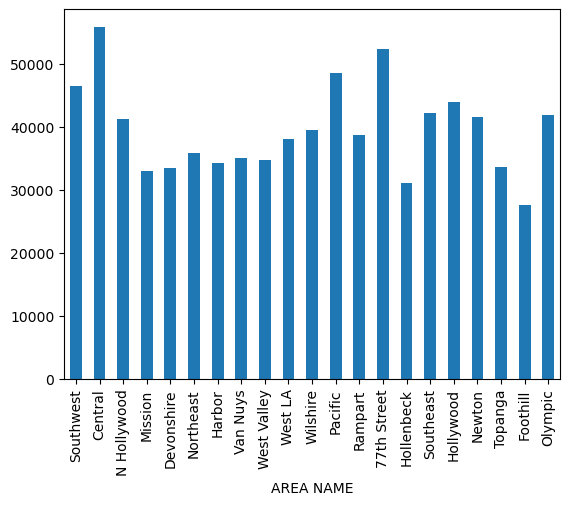

In [13]:
crime_group_by_area['Crm Cd Desc'].count().plot(kind='bar')

<Axes: ylabel='Crm Cd Desc'>

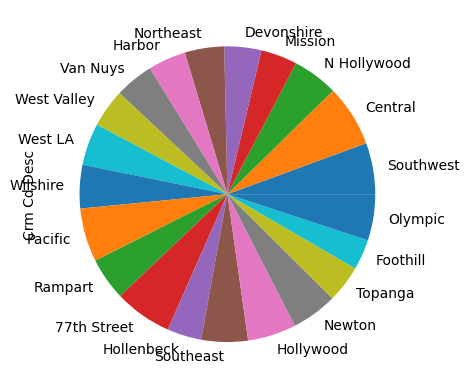

In [14]:
crime_group_by_area['Crm Cd Desc'].count().plot(kind='pie')